<a href="https://colab.research.google.com/github/Chandu106/Bit_predict/blob/main/Bitpredict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!nvidia-smi -L

GPU 0: Tesla T4 (UUID: GPU-c51a6f53-5ae4-f55f-b192-3cb37b0da842)


# **Get Data**

In [3]:
# Download Bitcoin historical data from GitHub
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv

--2023-10-23 10:01:41--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 178509 (174K) [text/plain]
Saving to: ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’

BTC_USD_2013-10-01_ 100%[===================>] 174.33K  --.-KB/s    in 0.01s   

2023-10-23 10:01:42 (13.9 MB/s) - ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’ saved [178509/178509]



In [4]:
import pandas as pd
df = pd.read_csv("/content/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv",
                 parse_dates=["Date"],
                 index_col=["Date"])
df.head()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2013-10-01,BTC,123.65499,124.30466,124.75166,122.56349
2013-10-02,BTC,125.45500,123.65499,125.75850,123.63383
2013-10-03,BTC,108.58483,125.45500,125.66566,83.32833
2013-10-04,BTC,118.67466,108.58483,118.67500,107.05816
2013-10-05,BTC,121.33866,118.67466,121.93633,118.00566


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2787 entries, 2013-10-01 to 2021-05-18
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Currency             2787 non-null   object 
 1   Closing Price (USD)  2787 non-null   float64
 2   24h Open (USD)       2787 non-null   float64
 3   24h High (USD)       2787 non-null   float64
 4   24h Low (USD)        2787 non-null   float64
dtypes: float64(4), object(1)
memory usage: 130.6+ KB


In [6]:
len(df)

2787

In [7]:
bitcoin_prices = pd.DataFrame(df["Closing Price (USD)"]).rename(columns={"Closing Price (USD)": "Price"})
bitcoin_prices.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


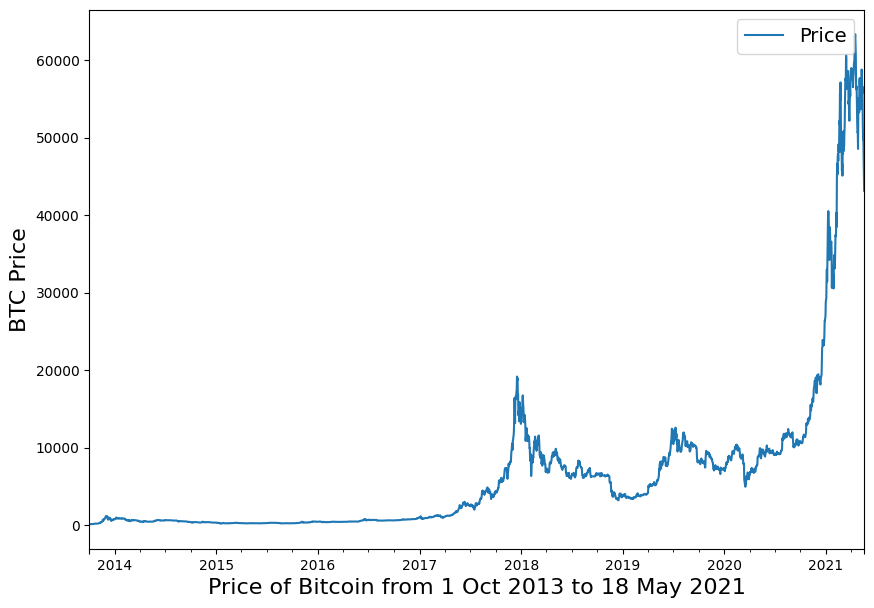

In [8]:
import matplotlib.pyplot as plt
bitcoin_prices.plot(figsize=(10,7))
plt.ylabel("BTC Price", fontsize=16)
plt.xlabel("Price of Bitcoin from 1 Oct 2013 to 18 May 2021", fontsize=16)
plt.legend(fontsize=14);

*Importing time series data with python csv module*

In [9]:
import csv
from datetime import datetime

timesteps = []
btc_price = []
with open("/content/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv","r") as f:
    csv_reader = csv.reader(f, delimiter=",")
    next(csv_reader)
    for line in csv_reader:
        timesteps.append(datetime.strptime(line[1], "%Y-%m-%d"))# get the dates as dates (not strings), strptime = string parse time
        btc_price.append(float(line[2]))

timesteps[:10], btc_price[:10]

([datetime.datetime(2013, 10, 1, 0, 0),
  datetime.datetime(2013, 10, 2, 0, 0),
  datetime.datetime(2013, 10, 3, 0, 0),
  datetime.datetime(2013, 10, 4, 0, 0),
  datetime.datetime(2013, 10, 5, 0, 0),
  datetime.datetime(2013, 10, 6, 0, 0),
  datetime.datetime(2013, 10, 7, 0, 0),
  datetime.datetime(2013, 10, 8, 0, 0),
  datetime.datetime(2013, 10, 9, 0, 0),
  datetime.datetime(2013, 10, 10, 0, 0)],
 [123.65499,
  125.455,
  108.58483,
  118.67466,
  121.33866,
  120.65533,
  121.795,
  123.033,
  124.049,
  125.96116])

Text(0, 0.5, 'BTC Price')

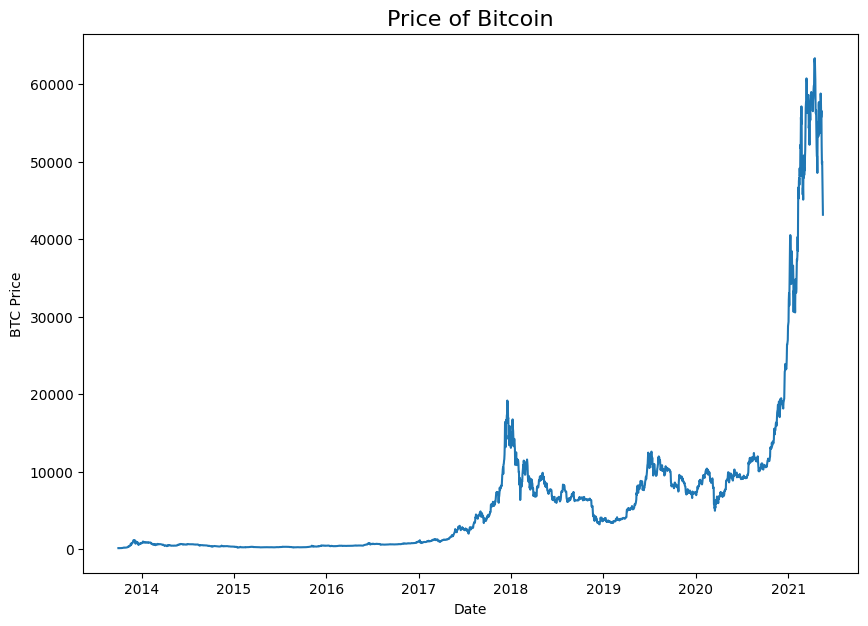

In [10]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(10,7))
plt.plot(timesteps, btc_price)
plt.title("Price of Bitcoin", fontsize=16)
plt.xlabel("Date")
plt.ylabel("BTC Price")

# **Format Data Part 1: Creating train and test datasets**

*Creating training and testing datasplits in a wrong way*

In [11]:
time_steps = bitcoin_prices.index.to_numpy()
prices = bitcoin_prices["Price"].to_numpy()

In [12]:
time_steps[:5], prices[:5]

(array(['2013-10-01T00:00:00.000000000', '2013-10-02T00:00:00.000000000',
        '2013-10-03T00:00:00.000000000', '2013-10-04T00:00:00.000000000',
        '2013-10-05T00:00:00.000000000'], dtype='datetime64[ns]'),
 array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866]))

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(time_steps,
                                                    prices,
                                                    test_size=0.2,
                                                    random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2229,), (558,), (2229,), (558,))

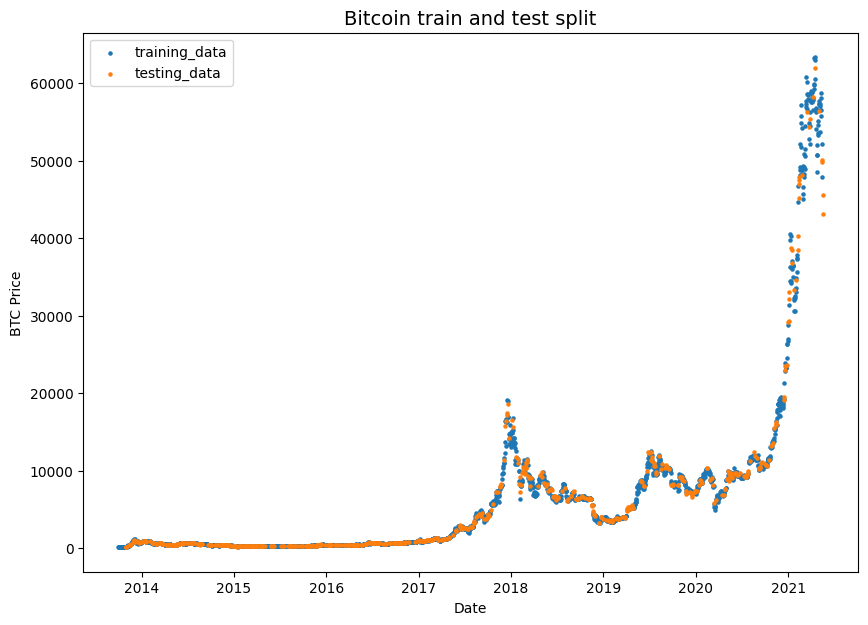

In [14]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.scatter(X_train, y_train, s=5, label="training_data")
plt.scatter(X_test, y_test , s=5, label="testing_data")
plt.xlabel("Date")
plt.ylabel("BTC Price")
plt.title("Bitcoin train and test split", fontsize=14)
plt.legend()
plt.show();


*Creating training and testing datasplits in right way*

In [15]:
split_size = int(0.8 * len(prices))
X_train, y_train, = time_steps[:split_size], prices[:split_size]
X_test, y_test = time_steps[split_size:], prices[split_size:]

len(X_train), len(X_test), len(y_train), len(y_test)

(2229, 558, 2229, 558)

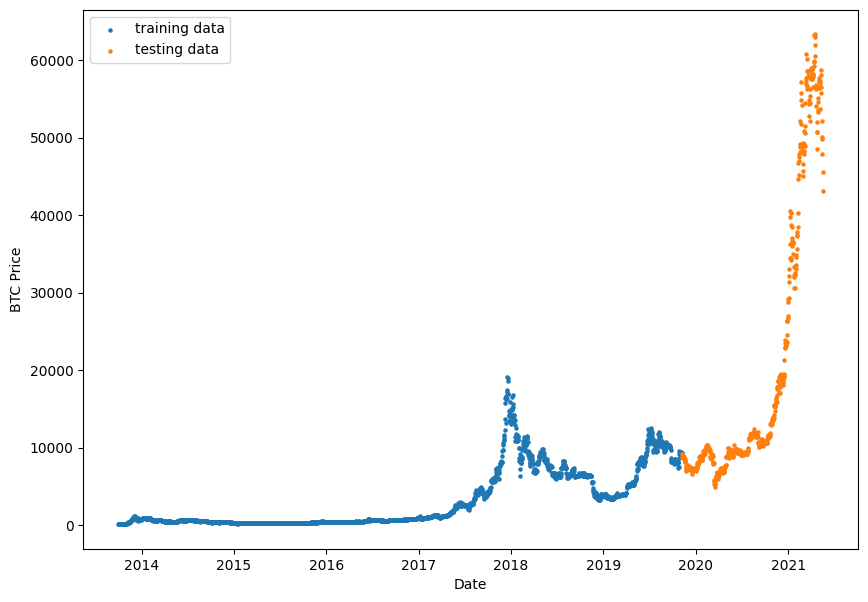

In [16]:
plt.figure(figsize=(10,7))
plt.scatter(X_train, y_train, s=5, label="training data")
plt.scatter(X_test, y_test, s=5, label="testing data")
plt.xlabel("Date")
plt.ylabel("BTC Price")
plt.legend()
plt.show();

*Creating a plotting function*

In [17]:
def plot_time_series(time_steps, values, format=".", start=0, end=None, label=None):
    plt.plot(time_steps[start:end], values[start:end], format, label=label)
    plt.xlabel("Time")
    plt.ylabel("BTC Price")
    plt.legend(fontsize=14)
    plt.grid(True)

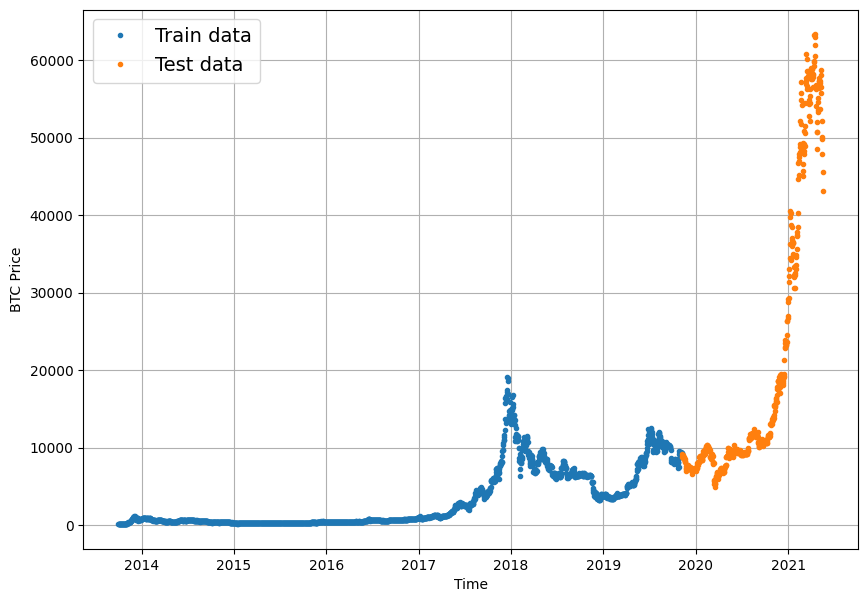

In [18]:
plt.figure(figsize=(10,7))
plot_time_series(time_steps=X_train, values=y_train, label="Train data")
plot_time_series(time_steps=X_test, values=y_test, label="Test data")

# **Model-0 : Naive forecast(baseline)**

In [19]:
naive_forecast = y_test[:-1] #naive forecast equals every value excluding the last value
naive_forecast[:10], naive_forecast[-10:] #view first 10 and last 10

(array([9226.48582088, 8794.35864452, 8798.04205463, 9081.18687849,
        8711.53433917, 8760.89271814, 8749.52059102, 8656.97092235,
        8500.64355816, 8469.2608989 ]),
 array([57107.12067189, 58788.20967893, 58102.19142623, 55715.54665129,
        56573.5554719 , 52147.82118698, 49764.1320816 , 50032.69313676,
        47885.62525472, 45604.61575361]))

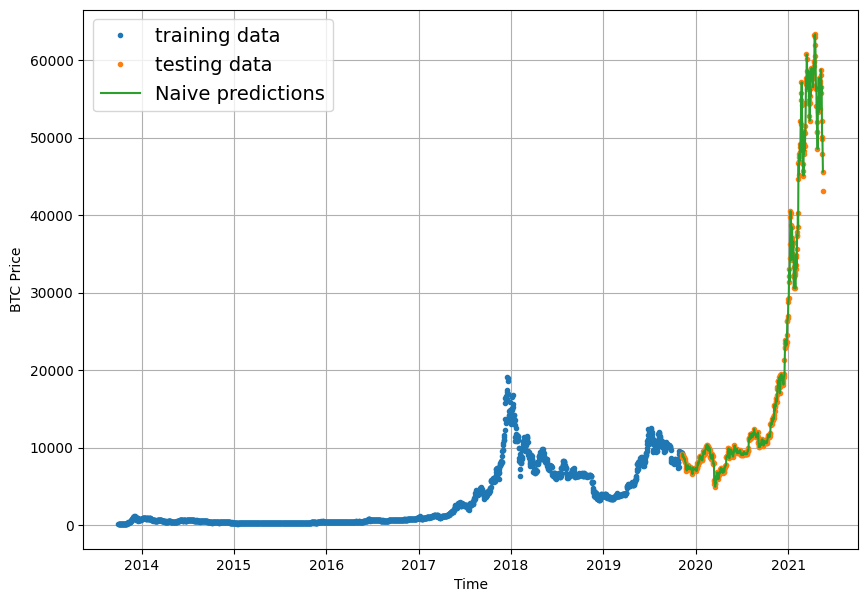

In [20]:
plt.figure(figsize=(10,7))
plot_time_series(time_steps = X_train, values = y_train, label = "training data")
plot_time_series(time_steps = X_test, values = y_test, label = "testing data")
plot_time_series(time_steps = X_test[1:], values = naive_forecast,format = "-",label = "Naive predictions")

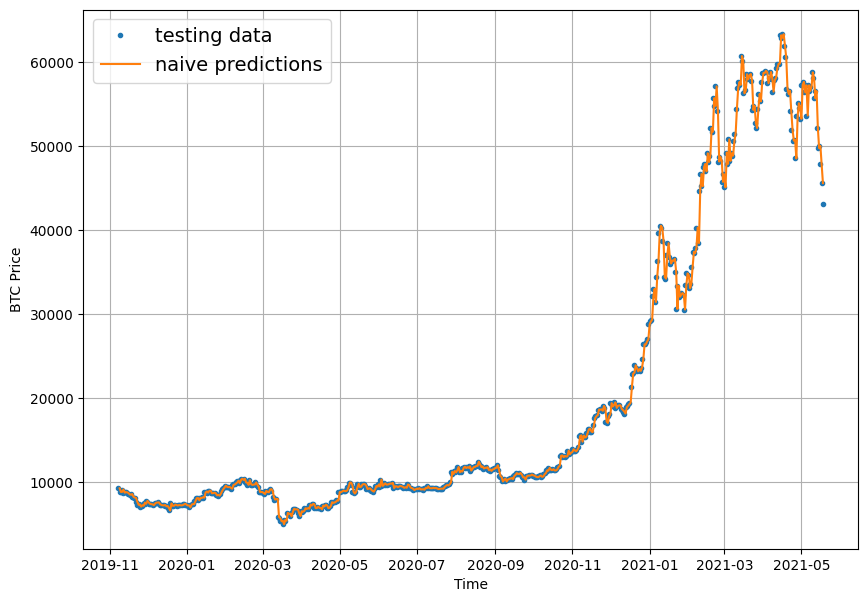

In [21]:
plt.figure(figsize=(10,7))
plot_time_series(time_steps = X_test, values = y_test, label = "testing data")
plot_time_series(time_steps = X_test[1:], format = "-", values = naive_forecast, label = "naive predictions")

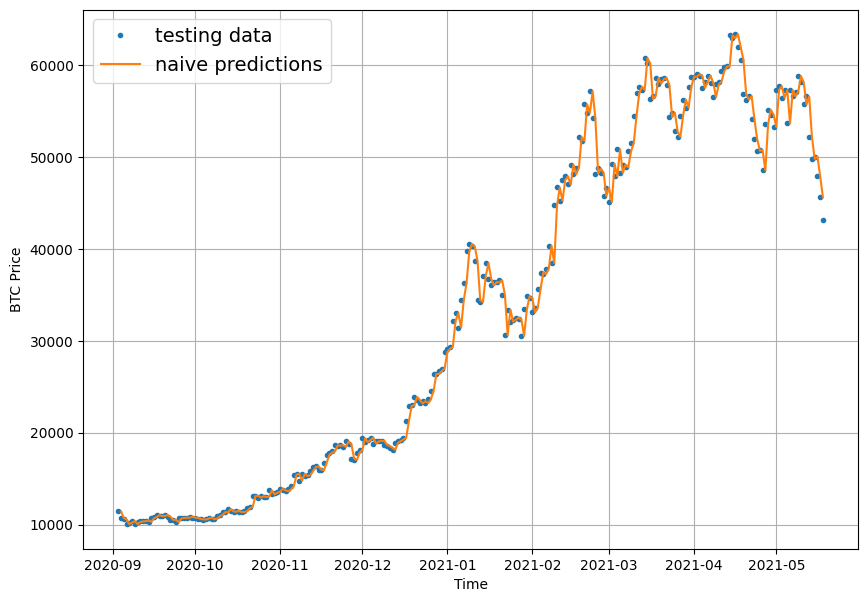

In [22]:
plt.figure(figsize=(10,7))
offset = 300
plot_time_series(time_steps = X_test, values = y_test, start = offset, label = "testing data")
plot_time_series(time_steps = X_test[1:], format = "-", values = naive_forecast, start = offset, label = "naive predictions")

In [23]:
import tensorflow as tf

In [24]:
def mean_absolute_scaled_error(y_true, y_pred):
    mae = tf.reduce_mean(tf.abs(y_true, y_pred))
    mae_naive_no_season = tf.reduce_mean(tf.abs(y_true[1:] - y_pred[:-1]))
    return mae / mae_naive_no_season

In [25]:
def evaluate_preds(y_true, y_pred):
    y_true = tf.cast(y_true, dtype=tf.float32)
    y_pred = tf.cast(y_pred, dtype=tf.float32)

    mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
    mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)
    rmse = tf.sqrt(mse)
    mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
    mase = mean_absolute_scaled_error(y_true, y_pred)

    return {"mae": mae.numpy(),
            "mse": mse.numpy(),
            "rmse": rmse.numpy(),
            "mape": mape.numpy(),
            "mase": mase.numpy()}

In [26]:
naive_results = evaluate_preds(y_true = y_test[1:],
                               y_pred = naive_forecast)
naive_results

{'mae': 567.9802,
 'mse': 1147547.0,
 'rmse': 1071.2362,
 'mape': 2.516525,
 'mase': 24.464115}

In [27]:
tf.reduce_mean(y_test).numpy()

20056.632963737222

# **Formating Data Part 2: Windowing dataset**

In [28]:
HORIZON = 1
WINDOW_SIZE = 7

In [29]:
def get_labelled_windows(x, horizon=1):
    return x[:,:-horizon], x[:,-horizon:]

In [30]:
test_window, test_label = get_labelled_windows(tf.expand_dims(tf.range(8)+1, axis=0), horizon=HORIZON)
print(f"Window: {tf.squeeze(test_window).numpy()} -> Label: {tf.squeeze(test_label).numpy()}")


Window: [1 2 3 4 5 6 7] -> Label: 8


In [31]:
# creating function to view numpy arrays as windows

def make_windows(x, window_size=7, horizon=1):

    #1 creating a window of the window size and add the horizon at the end of the array for later labelling
    window_step = np.expand_dims(np.arange(window_size + horizon), axis=0)

    #2 create a 2d array with multiple window steps (minus1 to count 0 indexing)
    window_indexes = window_step + np.expand_dims(np.arange(len(x) - (window_size+horizon-1)), axis=0).T

    #3 Index on the target array(time_series)
    windowed_array = x[window_indexes]

    #4 get the labelled windows
    windows, labels = get_labelled_windows(windowed_array, horizon=horizon)

    return windows, labels


In [32]:
full_windows, full_labels = make_windows(prices, window_size = WINDOW_SIZE, horizon = HORIZON)
len(full_windows), len(full_labels)

(2780, 2780)

In [33]:
for i in range(3):
    print(full_windows[i], full_labels[i])

[123.65499 125.455   108.58483 118.67466 121.33866 120.65533 121.795  ] [123.033]
[125.455   108.58483 118.67466 121.33866 120.65533 121.795   123.033  ] [124.049]
[108.58483 118.67466 121.33866 120.65533 121.795   123.033   124.049  ] [125.96116]


# **Turning windows into training and testing sets**

In [34]:
# Make the train/test splits
def make_train_test_splits(windows, labels, test_split=0.2):
  """
  Splits matching pairs of windows and labels into train and test splits.
  """
  split_size = int(len(windows) * (1-test_split)) # this will default to 80% train/20% test
  train_windows = windows[:split_size]
  train_labels = labels[:split_size]
  test_windows = windows[split_size:]
  test_labels = labels[split_size:]
  return train_windows, test_windows, train_labels, test_labels

In [35]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2224, 556, 2224, 556)

# **Making a Modelling Checkpoint**

In [36]:
import os

# Create a function to implement a ModelCheckpoint callback with a specific filename
def create_model_checkpoint(model_name, save_path="model_experiments"):
  return tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(save_path, model_name), # create filepath to save model
                                            verbose=0, # only output a limited amount of text
                                            save_best_only=True) # save only the best model to file


In [37]:
import absl.logging
absl.logging.set_verbosity(absl.logging.ERROR)

# **Model-01: Dense Model (window = 7, horizon = 1)**

In [38]:
import tensorflow as tf
from tensorflow.keras import layers

# Set random seed for as reproducible results as possible
tf.random.set_seed(42)

# Construct model
model_1 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(HORIZON, activation="linear") # linear activation is the same as having no activation
], name="model_1_dense") # give the model a name so we can save it

# Compile model
model_1.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"]) # we don't necessarily need this when the loss function is already MAE

# Fit model
model_1.fit(x=train_windows, # train windows of 7 timesteps of Bitcoin prices
            y=train_labels, # horizon value of 1 (using the previous 7 timesteps to predict next day)
            epochs=100,
            verbose=1,
            batch_size=128,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_1.name)]) # create ModelCheckpoint callback to save best model


Epoch 1/100
18/18 [==============================] - 6s 47ms/step - loss: 1967.2623 - mae: 1967.2623 - val_loss: 4076.5898 - val_mae: 4076.5898
Epoch 2/100
18/18 [==============================] - 0s 27ms/step - loss: 327.1333 - mae: 327.1333 - val_loss: 1089.8373 - val_mae: 1089.8373
Epoch 3/100
18/18 [==============================] - 0s 27ms/step - loss: 204.7245 - mae: 204.7245 - val_loss: 1050.8491 - val_mae: 1050.8491
Epoch 4/100
18/18 [==============================] - 0s 27ms/step - loss: 188.4057 - mae: 188.4057 - val_loss: 1002.6987 - val_mae: 1002.6987
Epoch 5/100
18/18 [==============================] - 0s 28ms/step - loss: 176.9928 - mae: 176.9928 - val_loss: 967.4249 - val_mae: 967.4249
Epoch 6/100
18/18 [==============================] - 0s 27ms/step - loss: 172.9161 - mae: 172.9161 - val_loss: 952.7226 - val_mae: 952.7226
Epoch 7/100
18/18 [==============================] - 0s 28ms/step - loss: 167.0998 - mae: 167.0998 - val_loss: 895.7585 - val_mae: 895.7585
Epoch 8/10

In [39]:
model_1.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 3ms/step - loss: 619.3049 - mae: 619.3049


[619.3048706054688, 619.3048706054688]

In [40]:
# Load in saved best performing model_1 and evaluate on test data
model_1 = tf.keras.models.load_model("model_experiments/model_1_dense")
model_1.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 3ms/step - loss: 574.6943 - mae: 574.6943


[574.6942749023438, 574.6942749023438]

In [41]:
def make_preds(model, input_data):
    forecast = model.predict(input_data)
    return tf.squeeze(forecast)

In [42]:
model_1_preds = make_preds(model_1, test_windows)

18/18 [==============================] - 0s 2ms/step


In [43]:
model_1_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8874.918, 8773.52 , 9020.347, 8845.651, 8718.018, 8692.758,
       8714.071, 8550.633, 8429.91 , 8535.192], dtype=float32)>

In [44]:
model_1_results = evaluate_preds(y_true = tf.squeeze(test_labels),
                                 y_pred = model_1_preds)
model_1_results

{'mae': 574.6944,
 'mse': 1189736.4,
 'rmse': 1090.7504,
 'mape': 2.582093,
 'mase': 24.18397}

In [45]:
naive_results

{'mae': 567.9802,
 'mse': 1147547.0,
 'rmse': 1071.2362,
 'mape': 2.516525,
 'mase': 24.464115}

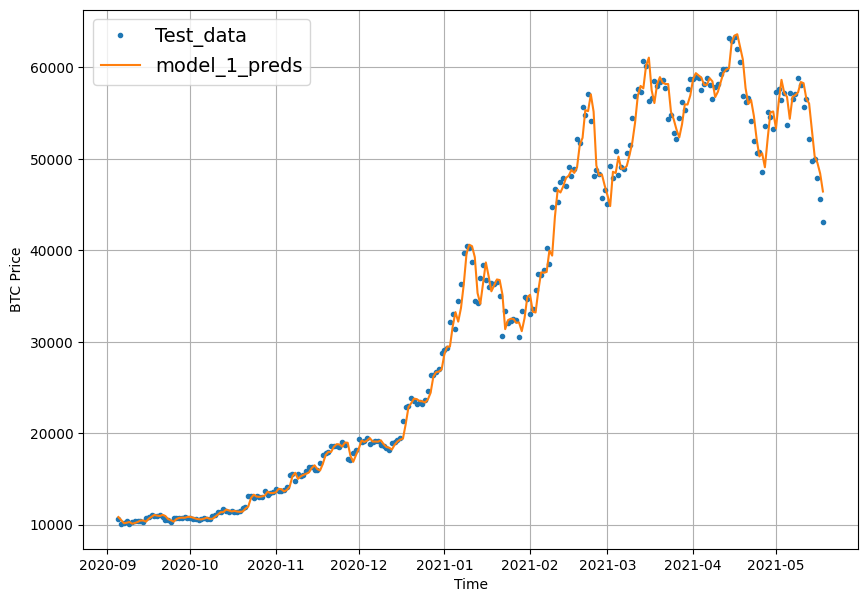

In [46]:
offset = 300
plt.figure(figsize=(10,7))

plot_time_series(time_steps=X_test[-len(test_windows):], values=test_labels[:, 0], start=offset, label="Test_data")
plot_time_series(time_steps=X_test[-len(test_windows):], values=model_1_preds, start=offset, format="-", label="model_1_preds")

# **Model 2: Dense (Window: 30, horizon: 1)**

In [47]:
HORIZON = 1
WINDOW_SIZE = 30

In [48]:
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(2757, 2757)

In [49]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(windows=full_windows, labels=full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2205, 552, 2205, 552)

In [50]:
tf.random.set_seed(42)

# Create model (same model as model 1 but data input will be different)
model_2 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(HORIZON) # need to predict horizon number of steps into the future
], name="model_2_dense")

model_2.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

model_2.fit(train_windows,
            train_labels,
            epochs=100,
            batch_size=128,
            verbose=0,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_2.name)])

In [51]:
model_2.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 620.5280


620.5280151367188

In [52]:
model_2 = tf.keras.models.load_model("model_experiments/model_2_dense/")
model_2.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 604.0324


604.0324096679688

In [53]:
model_2_preds = make_preds(model_2,
                           input_data=test_windows)

18/18 [==============================] - 0s 2ms/step


In [54]:
model_2_results = evaluate_preds(y_true=tf.squeeze(test_labels), # remove 1 dimension of test labels
                                 y_pred=model_2_preds)
model_2_results

{'mae': 604.0324,
 'mse': 1278047.0,
 'rmse': 1130.5073,
 'mape': 2.7452471,
 'mase': 23.62751}

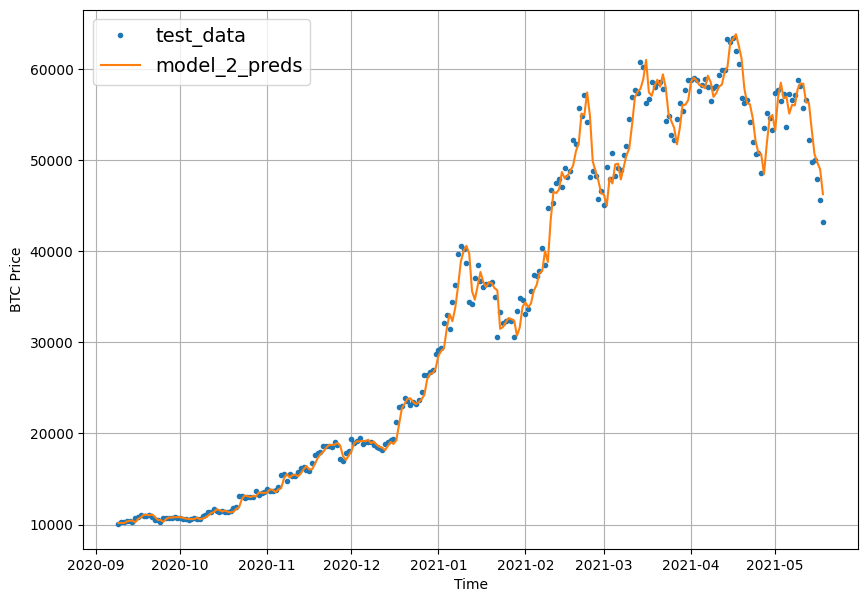

In [55]:
offset = 300
plt.figure(figsize=(10, 7))
# Account for the test_window offset
plot_time_series(time_steps=X_test[-len(test_windows):], values=test_labels[:, 0], start=offset, label="test_data")
plot_time_series(time_steps=X_test[-len(test_windows):], values=model_2_preds, start=offset, format="-", label="model_2_preds")

# **Model 3: Dense (Window=30, Horizon=7)**

In [56]:
HORIZON = 7
WINDOW_SIZE = 30
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(2751, 2751)

In [57]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(windows=full_windows, labels=full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2200, 551, 2200, 551)

In [58]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    layers.Dense(128, activation="relu"),
    layers.Dense(HORIZON)
],name = "model_3_dense")

model_3.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

model_3.fit(train_windows,
            train_labels,
            batch_size=128,
            epochs=100,
            verbose=0,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_3.name)])

In [59]:
model_3.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 1359.8422


1359.8421630859375

In [60]:
model_3 = tf.keras.models.load_model("model_experiments/model_3_dense/")
model_3.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 1223.8170


1223.8170166015625

In [61]:
model_3_preds = make_preds(model_3, test_windows)
model_3_preds[:5]

18/18 [==============================] - 0s 2ms/step


<tf.Tensor: shape=(5, 7), dtype=float32, numpy=
array([[9454.354 , 9301.833 , 9283.555 , 9612.18  , 9662.98  , 9544.41  ,
        9522.561 ],
       [8970.912 , 8815.886 , 8968.774 , 9154.385 , 9154.469 , 9244.759 ,
        9189.9375],
       [8814.089 , 8674.984 , 8831.499 , 8751.783 , 9052.633 , 9203.706 ,
        9072.092 ],
       [9016.801 , 8859.76  , 9010.254 , 9025.971 , 9225.095 , 9330.739 ,
        9168.14  ],
       [9078.959 , 8716.483 , 8779.376 , 8997.394 , 9106.57  , 9083.808 ,
        9081.531 ]], dtype=float32)>

In [62]:
model_3_results = evaluate_preds(y_true = test_labels,
                                 y_pred = model_3_preds)
model_3_results

{'mae': array([  689.9096  ,   395.84766 ,   296.86746 ,   464.37094 ,
          432.82297 ,   443.2653  ,   518.79755 ,   577.3045  ,
          600.8229  ,   645.2666  ,   843.7191  ,   836.13513 ,
          828.0138  ,   849.4366  ,   722.8926  ,   331.35037 ,
          205.16428 ,   230.76039 ,   267.86203 ,   239.49797 ,
          279.8344  ,   198.90193 ,   356.95367 ,   341.51703 ,
          215.69894 ,   122.71798 ,   208.83363 ,   202.69621 ,
          197.72258 ,   212.52824 ,   283.7604  ,   394.26367 ,
          254.9735  ,   353.44412 ,   272.76556 ,   257.08707 ,
          305.43326 ,   240.29848 ,   246.9366  ,   253.93506 ,
          479.5083  ,   106.49916 ,   103.41518 ,   126.05497 ,
           98.515   ,   128.71617 ,    70.06055 ,   167.26541 ,
          133.92732 ,   179.19106 ,   172.02267 ,    85.526505,
          187.79897 ,   155.89111 ,   213.18436 ,   374.42194 ,
          523.0375  ,   492.3737  ,   502.3393  ,   569.7685  ,
          365.61963 ,   171.60574

In [63]:
tf.squeeze(test_labels).shape , tf.squeeze(model_3_preds).shape

(TensorShape([551, 7]), TensorShape([551, 7]))

In [64]:
model_3_results = evaluate_preds(y_true = tf.squeeze(test_labels),
                                 y_pred = model_3_preds)
model_3_results

{'mae': array([  689.9096  ,   395.84766 ,   296.86746 ,   464.37094 ,
          432.82297 ,   443.2653  ,   518.79755 ,   577.3045  ,
          600.8229  ,   645.2666  ,   843.7191  ,   836.13513 ,
          828.0138  ,   849.4366  ,   722.8926  ,   331.35037 ,
          205.16428 ,   230.76039 ,   267.86203 ,   239.49797 ,
          279.8344  ,   198.90193 ,   356.95367 ,   341.51703 ,
          215.69894 ,   122.71798 ,   208.83363 ,   202.69621 ,
          197.72258 ,   212.52824 ,   283.7604  ,   394.26367 ,
          254.9735  ,   353.44412 ,   272.76556 ,   257.08707 ,
          305.43326 ,   240.29848 ,   246.9366  ,   253.93506 ,
          479.5083  ,   106.49916 ,   103.41518 ,   126.05497 ,
           98.515   ,   128.71617 ,    70.06055 ,   167.26541 ,
          133.92732 ,   179.19106 ,   172.02267 ,    85.526505,
          187.79897 ,   155.89111 ,   213.18436 ,   374.42194 ,
          523.0375  ,   492.3737  ,   502.3393  ,   569.7685  ,
          365.61963 ,   171.60574

# **Making our evaluation function work for larger horizon**

In [65]:
def evaluate_preds(y_true, y_pred):
    y_true = tf.cast(y_true, dtype=tf.float32)
    y_pred = tf.cast(y_pred, dtype=tf.float32)

    mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
    mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)
    rmse = tf.sqrt(mse)
    mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
    mase = mean_absolute_scaled_error(y_true, y_pred)

    if mae.ndim>0:
        mae = tf.reduce_mean(mae)
        mse = tf.reduce_mean(mse)
        rmse = tf.reduce_mean(rmse)
        mape = tf.reduce_mean(mape)
        mase = tf.reduce_mean(mase)

    return {"mae": mae.numpy(),
            "mse": mse.numpy(),
            "rmse": rmse.numpy(),
            "mape": mape.numpy(),
            "mase": mase.numpy()}

In [66]:
model_3_results = evaluate_preds(y_true = test_labels,
                                 y_pred = model_3_preds)
model_3_results

{'mae': 1223.8169,
 'mse': 5217304.5,
 'rmse': 1403.7622,
 'mape': 5.5486236,
 'mase': 14.445388}

In [67]:
X_test

array(['2019-11-08T00:00:00.000000000', '2019-11-09T00:00:00.000000000',
       '2019-11-10T00:00:00.000000000', '2019-11-11T00:00:00.000000000',
       '2019-11-12T00:00:00.000000000', '2019-11-13T00:00:00.000000000',
       '2019-11-14T00:00:00.000000000', '2019-11-15T00:00:00.000000000',
       '2019-11-16T00:00:00.000000000', '2019-11-17T00:00:00.000000000',
       '2019-11-18T00:00:00.000000000', '2019-11-19T00:00:00.000000000',
       '2019-11-20T00:00:00.000000000', '2019-11-21T00:00:00.000000000',
       '2019-11-22T00:00:00.000000000', '2019-11-23T00:00:00.000000000',
       '2019-11-24T00:00:00.000000000', '2019-11-25T00:00:00.000000000',
       '2019-11-26T00:00:00.000000000', '2019-11-27T00:00:00.000000000',
       '2019-11-28T00:00:00.000000000', '2019-11-29T00:00:00.000000000',
       '2019-11-30T00:00:00.000000000', '2019-12-01T00:00:00.000000000',
       '2019-12-02T00:00:00.000000000', '2019-12-03T00:00:00.000000000',
       '2019-12-04T00:00:00.000000000', '2019-12-05

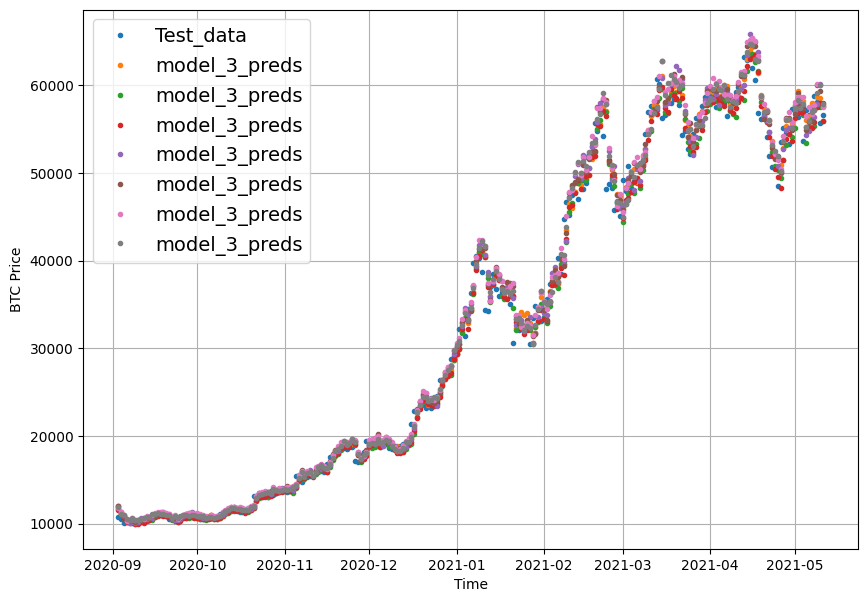

In [68]:
offset = 300
plt.figure(figsize=(10, 7))
plot_time_series(time_steps=X_test[:len(test_windows)], values=test_labels[:, 0], start=offset, label="Test_data")
plot_time_series(time_steps=X_test[:len(test_windows)], values=model_3_preds, start=offset, label="model_3_preds")


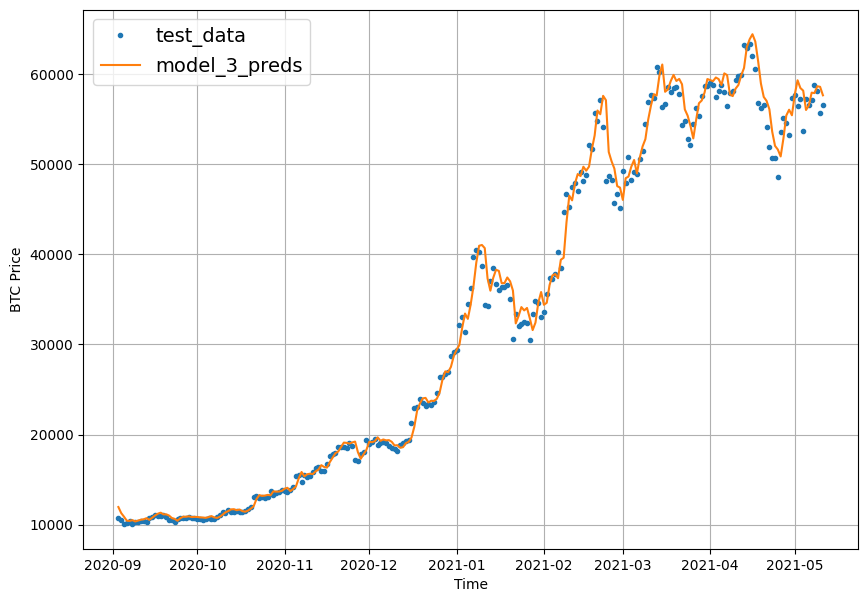

In [69]:
offset = 300
plt.figure(figsize=(10,7))
plot_time_series(time_steps=X_test[:len(test_windows)],
                 values=test_labels[:,0],
                 start=offset,
                 label="test_data")
plot_time_series(time_steps=X_test[:len(test_windows)],
                 values=model_3_preds[:,0],
                 format="-",
                 start=offset,
                 label="model_3_preds")

In [70]:
len(test_windows)

551

In [71]:
X_test[:len(test_windows)].shape, test_labels[:,0].shape, model_3_preds[:,0].shape

((551,), (551,), TensorShape([551]))

In [72]:
tf.reduce_mean(model_3_preds, axis=1).shape

TensorShape([551])

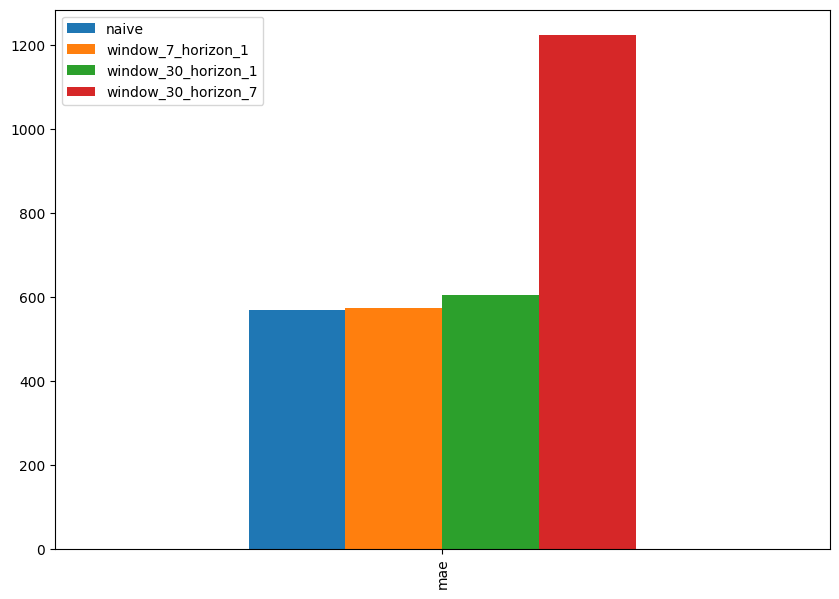

In [73]:
pd.DataFrame({"naive": naive_results["mae"],
             "window_7_horizon_1": model_1_results["mae"],
             "window_30_horizon_1":model_2_results["mae"],
             "window_30_horizon_7":model_3_results["mae"]}, index=["mae"]).plot(figsize=(10, 7), kind="bar");

# **Model 4: Conv1D**

In [74]:
HORIZON = 1
WINDOW_SIZE = 7

In [75]:
full_windows, full_labels = make_windows(prices, window_size = WINDOW_SIZE, horizon = HORIZON)
len(full_windows), len(full_labels)

(2780, 2780)

In [76]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2224, 556, 2224, 556)

In [77]:
train_windows[0].shape

(7,)

In [78]:
x = tf.constant(train_windows[0])
expand_dims_layer = layers.Lambda(lambda x: tf.expand_dims(x, axis=1))
expand_dims_layer(x).shape , train_windows[0].shape

(TensorShape([7, 1]), (7,))

In [79]:
tf.random.set_seed(42)

# Create model
model_4 = tf.keras.Sequential([
  # Create Lambda layer to reshape inputs, without this layer, the model will error
  layers.Lambda(lambda x: tf.expand_dims(x, axis=1)), # resize the inputs to adjust for window size / Conv1D 3D input requirements
  layers.Conv1D(filters=128, kernel_size=5, padding="causal", activation="relu"),
  layers.Dense(HORIZON)
], name="model_4_conv1D")

# Compile model
model_4.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

# Fit model
model_4.fit(train_windows,
            train_labels,
            batch_size=128,
            epochs=100,
            verbose=0,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_4.name)])

In [80]:
model_4.summary()

Model: "model_4_conv1D"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda_1 (Lambda)           (None, 1, 7)              0         
                                                                 
 conv1d (Conv1D)             (None, 1, 128)            4608      
                                                                 
 dense_6 (Dense)             (None, 1, 1)              129       
                                                                 
Total params: 4737 (18.50 KB)
Trainable params: 4737 (18.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [81]:
# Load in best performing Conv1D model and evaluate it on the test data
model_4 = tf.keras.models.load_model("model_experiments/model_4_conv1D")
model_4.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 6ms/step - loss: 570.7365


570.7365112304688

In [82]:
# Make predictions
model_4_preds = make_preds(model_4, test_windows)
model_4_preds[:10]


18/18 [==============================] - 0s 4ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8911.52 , 8805.921, 9018.003, 8807.254, 8765.749, 8757.511,
       8701.946, 8550.061, 8484.764, 8535.057], dtype=float32)>

In [83]:
model_4_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_4_preds)
model_4_results


{'mae': 570.7365,
 'mse': 1184503.6,
 'rmse': 1088.349,
 'mape': 2.5597188,
 'mase': 24.14788}

In [84]:
tf.random.set_seed(42)

# Create model
model_4a = tf.keras.Sequential([
  # Create Lambda layer to reshape inputs, without this layer, the model will error
  layers.Lambda(lambda x: tf.expand_dims(x, axis=1)), # resize the inputs to adjust for window size / Conv1D 3D input requirements
  layers.Conv1D(filters=512, kernel_size=3, padding="causal", activation="relu"),
  layers.Dense(HORIZON)
], name="model_4a_conv1D")

# Compile model
model_4a.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

# Fit model
model_4a.fit(train_windows,
            train_labels,
            batch_size=512,
            epochs=1000,
            verbose=0,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_4a.name)])

In [85]:
# Load in best performing Conv1D model and evaluate it on the test data
model_4a = tf.keras.models.load_model("model_experiments/model_4a_conv1D")
model_4a.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 6ms/step - loss: 562.5948


562.5948486328125

In [86]:
# Make predictions
model_4a_preds = make_preds(model_4a, test_windows)
model_4a_preds[:10]


18/18 [==============================] - 0s 3ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8853.886, 8787.001, 9031.654, 8775.955, 8749.788, 8736.346,
       8681.94 , 8528.567, 8458.982, 8529.85 ], dtype=float32)>

In [87]:
model_4a_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_4a_preds)
model_4a_results


{'mae': 562.59485,
 'mse': 1151743.1,
 'rmse': 1073.193,
 'mape': 2.5134509,
 'mase': 24.452503}

In [88]:
naive_results

{'mae': 567.9802,
 'mse': 1147547.0,
 'rmse': 1071.2362,
 'mape': 2.516525,
 'mase': 24.464115}

# **Model 5: RNN (LSTM)**

In [89]:
train_windows[0].shape, WINDOW_SIZE

((7,), 7)

In [90]:
tf.random.set_seed(42)

inputs = layers.Input(shape=(WINDOW_SIZE))
x = layers.Lambda(lambda x: tf.expand_dims(x, axis=1))(inputs)
x = layers.LSTM(256, activation="relu", return_sequences=True)(x)
x = layers.LSTM(128, activation = "relu")(x)
x = layers.Dense(32, activation="relu")(x)
output = layers.Dense(HORIZON)(x)
model_5 = tf.keras.Model(inputs, output, name = "model_5_lstm")

model_5.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

# Seems when saving the model several warnings are appearing: https://github.com/tensorflow/tensorflow/issues/47554
model_5.fit(train_windows,
            train_labels,
            epochs=100,
            verbose=0,
            batch_size=128,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_5.name)])

In [91]:
# Load in best version of model 5 and evaluate on the test data
model_5 = tf.keras.models.load_model("model_experiments/model_5_lstm/")
model_5.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 3ms/step - loss: 568.7621


568.7621459960938

In [92]:
# Make predictions with our LSTM model
model_5_preds = make_preds(model_5, test_windows)
model_5_preds[:10]

18/18 [==============================] - 0s 3ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8877.788, 8808.943, 9002.811, 8790.518, 8795.422, 8710.684,
       8694.101, 8535.613, 8476.428, 8516.95 ], dtype=float32)>

In [93]:
# Evaluate model 5 preds
model_5_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_5_preds)
model_5_results

{'mae': 568.76215,
 'mse': 1167901.4,
 'rmse': 1080.6948,
 'mape': 2.5549185,
 'mase': 24.353128}

# **Make a Multivariate Time Series Data**

In [94]:
bitcoin_prices.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


In [95]:
block_reward_1 = 50
block_reward_2 = 25 # 28 nov 2012
block_reward_3 = 12.5 # 9 jul 2016
block_reward_4 = 6.25 # 11 may 2020

block_reward_2_datatime = np.datetime64("2012-11-28")
block_reward_3_datetime = np.datetime64("2016-07-09")
block_reward_4_datetime = np.datetime64("2020-05-11")

In [96]:
block_reward_2_days = (block_reward_3_datetime - bitcoin_prices.index[0]).days
block_reward_3_days = (block_reward_4_datetime - bitcoin_prices.index[0]).days
block_reward_2_days, block_reward_3_days

(1012, 2414)

In [97]:
bitcoin_prices_block = bitcoin_prices.copy()

In [98]:
bitcoin_prices_block.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


In [99]:
# Add block_reward column
bitcoin_prices_block = bitcoin_prices.copy()
bitcoin_prices_block["block_reward"] = None

# Set values of block_reward column (it's the last column hence -1 indexing on iloc)
bitcoin_prices_block.iloc[:block_reward_2_days, -1] = block_reward_2
bitcoin_prices_block.iloc[block_reward_2_days:block_reward_3_days, -1] = block_reward_3
bitcoin_prices_block.iloc[block_reward_3_days:, -1] = block_reward_4
bitcoin_prices_block.head()

,Price,block_reward
Date,,
2013-10-01,123.65499,25
2013-10-02,125.45500,25
2013-10-03,108.58483,25
2013-10-04,118.67466,25
2013-10-05,121.33866,25


In [100]:
bitcoin_prices_block.tail()

,Price,block_reward
Date,,
2021-05-14,49764.132082,6.25
2021-05-15,50032.693137,6.25
2021-05-16,47885.625255,6.25
2021-05-17,45604.615754,6.25
2021-05-18,43144.471291,6.25


In [101]:
bitcoin_prices_block.block_reward[1500:1550]

Date
2017-11-09    12.5
2017-11-10    12.5
2017-11-11    12.5
2017-11-12    12.5
2017-11-13    12.5
2017-11-14    12.5
2017-11-15    12.5
2017-11-16    12.5
2017-11-17    12.5
2017-11-18    12.5
2017-11-19    12.5
2017-11-20    12.5
2017-11-21    12.5
2017-11-22    12.5
2017-11-23    12.5
2017-11-24    12.5
2017-11-25    12.5
2017-11-26    12.5
2017-11-27    12.5
2017-11-28    12.5
2017-11-29    12.5
2017-11-30    12.5
2017-12-01    12.5
2017-12-02    12.5
2017-12-03    12.5
2017-12-04    12.5
2017-12-05    12.5
2017-12-06    12.5
2017-12-07    12.5
2017-12-08    12.5
2017-12-09    12.5
2017-12-10    12.5
2017-12-11    12.5
2017-12-12    12.5
2017-12-13    12.5
2017-12-14    12.5
2017-12-15    12.5
2017-12-16    12.5
2017-12-17    12.5
2017-12-18    12.5
2017-12-19    12.5
2017-12-20    12.5
2017-12-21    12.5
2017-12-22    12.5
2017-12-23    12.5
2017-12-24    12.5
2017-12-25    12.5
2017-12-26    12.5
2017-12-27    12.5
2017-12-28    12.5
Name: block_reward, dtype: object

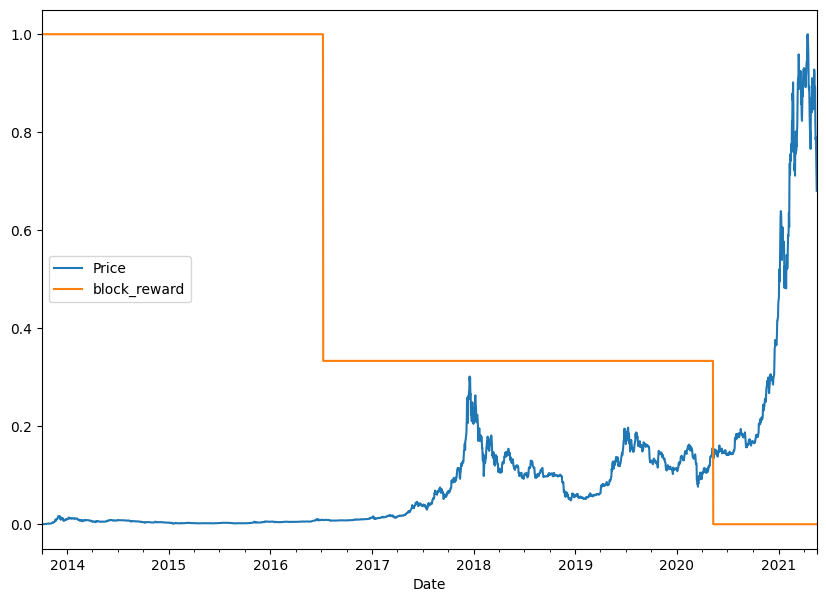

In [102]:
# Note: Because of the different scales of our values we'll scale them to be between 0 and 1.
from sklearn.preprocessing import minmax_scale
scaled_price_block_df = pd.DataFrame(minmax_scale(bitcoin_prices_block[["Price", "block_reward"]]), # we need to scale the data first
                                     columns=bitcoin_prices_block.columns,
                                     index=bitcoin_prices_block.index)
scaled_price_block_df.plot(figsize=(10, 7));


# **Making a windowed dataset with pandas**

In [103]:
bitcoin_prices_windowed = bitcoin_prices_block.copy()

for i in range(WINDOW_SIZE):
    bitcoin_prices_windowed[f"Price+{i+1}"] = bitcoin_prices_windowed["Price"].shift(periods=i+1)
bitcoin_prices_windowed.head(10)

,Price,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,,
2013-10-01,123.65499,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.45500,25,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.58483,25,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.67466,25,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
2013-10-05,121.33866,25,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN
2013-10-06,120.65533,25,121.33866,118.67466,108.58483,125.45500,123.65499,NaN,NaN
2013-10-07,121.79500,25,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499,NaN
2013-10-08,123.03300,25,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499
2013-10-09,124.04900,25,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500


In [104]:
# Let's create X & y, remove the NaN's and convert to float32 to prevent TensorFlow errors
X = bitcoin_prices_windowed.dropna().drop("Price", axis=1).astype(np.float32)
y = bitcoin_prices_windowed.dropna()["Price"].astype(np.float32)
X.head()

,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,
2013-10-08,25.0,121.794998,120.655327,121.338661,118.674660,108.584831,125.455002,123.654991
2013-10-09,25.0,123.032997,121.794998,120.655327,121.338661,118.674660,108.584831,125.455002
2013-10-10,25.0,124.049004,123.032997,121.794998,120.655327,121.338661,118.674660,108.584831
2013-10-11,25.0,125.961159,124.049004,123.032997,121.794998,120.655327,121.338661,118.674660
2013-10-12,25.0,125.279663,125.961159,124.049004,123.032997,121.794998,120.655327,121.338661


In [105]:
y.head()

Date
2013-10-08    123.032997
2013-10-09    124.049004
2013-10-10    125.961159
2013-10-11    125.279663
2013-10-12    125.927498
Name: Price, dtype: float32

In [106]:
split_size = int(len(X) * 0.8)
X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]
len(X_train), len(X_test), len(y_train), len(y_test)


(2224, 556, 2224, 556)

In [107]:
tf.random.set_seed(42)

# Make multivariate time series model
model_6 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  # layers.Dense(128, activation="relu"), # adding an extra layer here should lead to beating the naive model
  layers.Dense(HORIZON)
], name="model_6_dense_multivariate")

# Compile
model_6.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

# Fit
model_6.fit(X_train, y_train,
            epochs=100,
            batch_size=128,
            verbose=0, # only print 1 line per epoch
            validation_data=(X_test, y_test),
            callbacks=[create_model_checkpoint(model_name=model_6.name)])

In [108]:
# Make sure best model is loaded and evaluate
model_6 = tf.keras.models.load_model("model_experiments/model_6_dense_multivariate")
model_6.evaluate(X_test, y_test)


18/18 [==============================] - 0s 2ms/step - loss: 565.1447


565.1446533203125

In [109]:
# Make predictions on multivariate data
model_6_preds = tf.squeeze(model_6.predict(X_test))
model_6_preds[:10]

18/18 [==============================] - 0s 2ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8850.096, 8790.547, 9043.137, 8772.564, 8730.235, 8746.554,
       8662.331, 8545.129, 8447.407, 8533.139], dtype=float32)>

In [110]:
# Evaluate preds
model_6_results = evaluate_preds(y_true=y_test,
                                 y_pred=model_6_preds)
model_6_results

{'mae': 565.14465,
 'mse': 1160667.8,
 'rmse': 1077.3429,
 'mape': 2.5198483,
 'mase': 24.259592}

# **Model 7: N-BEATS Algorithm**

In [111]:
# creating NBeatsBlock custom Layer

class NBeatsBlock(tf.keras.layers.Layer):
    def __init__(self,
                 input_size: int,
                 theta_size: int,
                 horizon: int,
                 n_neurons: int,
                 n_layers: int,
                 **kwargs):
        super().__init__(**kwargs)
        self.input_size = input_size
        self.theta_size = theta_size
        self.horizon = horizon
        self.n_neurons = n_neurons
        self.n_layers = n_layers

        self.hidden = [tf.keras.layers.Dense(n_neurons, activation="relu") for _ in range(n_layers)]

        self.theta_layer = tf.keras.layers.Dense(theta_size, activation="linear", name="theta")

    def call(self, inputs):
        x = inputs
        for layer in self.hidden:
            x = layer(x)
        theta = self.theta_layer(x)

        backcast, forecast = theta[:,:self.input_size], theta[:,-self.horizon:]
        return backcast, forecast


In [112]:
tf.random.set_seed(42)
dummy_nbeats_block_layer = NBeatsBlock(input_size = WINDOW_SIZE,
                                       theta_size = WINDOW_SIZE+HORIZON,
                                       horizon = HORIZON,
                                       n_neurons = 128,
                                       n_layers = 4)

In [113]:
dummy_inputs = tf.expand_dims(tf.range(WINDOW_SIZE)+1, axis=0)
dummy_inputs

<tf.Tensor: shape=(1, 7), dtype=int32, numpy=array([[1, 2, 3, 4, 5, 6, 7]], dtype=int32)>

In [114]:
backcast, forecast = dummy_nbeats_block_layer(dummy_inputs)
backcast, forecast

(<tf.Tensor: shape=(1, 7), dtype=float32, numpy=
 array([[ 0.2567969 , -0.02919975,  0.01644167, -0.9907756 ,  0.5024816 ,
         -0.20941317,  1.7386992 ]], dtype=float32)>,
 <tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[0.57777023]], dtype=float32)>)

In [115]:
HORIZON = 1
WINDOW_SIZE = 7

In [116]:
bitcoin_prices.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


In [117]:
# Add windowed columns
bitcoin_prices_nbeats = bitcoin_prices.copy()
for i in range(WINDOW_SIZE):
  bitcoin_prices_nbeats[f"Price+{i+1}"] = bitcoin_prices_nbeats["Price"].shift(periods=i+1)
bitcoin_prices_nbeats.dropna().head()

,Price,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,
2013-10-08,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499
2013-10-09,124.04900,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500
2013-10-10,125.96116,124.04900,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483
2013-10-11,125.27966,125.96116,124.04900,123.03300,121.79500,120.65533,121.33866,118.67466
2013-10-12,125.92750,125.27966,125.96116,124.04900,123.03300,121.79500,120.65533,121.33866


In [118]:

# Make features and labels
X = bitcoin_prices_nbeats.dropna().drop("Price", axis=1)
y = bitcoin_prices_nbeats.dropna()["Price"]

# Make train and test sets
split_size = int(len(X) * 0.8)
X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]
len(X_train), len(y_train), len(X_test), len(y_test)

(2224, 2224, 556, 556)

In [119]:
# 1. Turn train and test arrays into tensor Datasets
train_features_dataset = tf.data.Dataset.from_tensor_slices(X_train)
train_labels_dataset = tf.data.Dataset.from_tensor_slices(y_train)

test_features_dataset = tf.data.Dataset.from_tensor_slices(X_test)
test_labels_dataset = tf.data.Dataset.from_tensor_slices(y_test)

# 2. Combine features & labels
train_dataset = tf.data.Dataset.zip((train_features_dataset, train_labels_dataset))
test_dataset = tf.data.Dataset.zip((test_features_dataset, test_labels_dataset))

# 3. Batch and prefetch for optimal performance
BATCH_SIZE = 1024 # taken from Appendix D in N-BEATS paper
train_dataset = train_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

train_dataset, test_dataset


(<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>,
 <_PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>)

In [120]:
N_EPOCHS = 5000
N_NEURONS = 512
N_LAYERS = 4
N_STACKS = 30

INPUT_SIZE = WINDOW_SIZE * HORIZON
THETA_SIZE = HORIZON + WINDOW_SIZE

INPUT_SIZE, THETA_SIZE

(7, 8)

In [121]:
tensor_1 = tf.range(10) + 10
tensor_2 = tf.range(10)

subtracted = layers.subtract([tensor_1, tensor_2])
added = layers.add([tensor_1, tensor_2])

print(f"Input tensors: {tensor_1.numpy()} & {tensor_2.numpy()}")
print(f"Subtracted tensors: {subtracted.numpy()}")
print(f"Added tensors: {added.numpy()}")

Input tensors: [10 11 12 13 14 15 16 17 18 19] & [0 1 2 3 4 5 6 7 8 9]
Subtracted tensors: [10 10 10 10 10 10 10 10 10 10]
Added tensors: [10 12 14 16 18 20 22 24 26 28]


In [122]:
%%time

tf.random.set_seed(42)

# 1. Setup N-BEATS Block layer
nbeats_block_layer = NBeatsBlock(input_size=INPUT_SIZE,
                                 theta_size=THETA_SIZE,
                                 horizon=HORIZON,
                                 n_neurons=N_NEURONS,
                                 n_layers=N_LAYERS,
                                 name="InitialBlock")

# 2. Create input to stacks
stack_input = layers.Input(shape=(INPUT_SIZE), name="stack_input")

# 3. Create initial backcast and forecast input (backwards predictions are referred to as residuals in the paper)
backcast, forecast = nbeats_block_layer(stack_input)
# Add in subtraction residual link, thank you to: https://github.com/mrdbourke/tensorflow-deep-learning/discussions/174
residuals = layers.subtract([stack_input, backcast], name=f"subtract_00")

# 4. Create stacks of blocks
for i, _ in enumerate(range(N_STACKS-1)): # first stack is already creted in (3)

  # 5. Use the NBeatsBlock to calculate the backcast as well as block forecast
  backcast, block_forecast = NBeatsBlock(
      input_size=INPUT_SIZE,
      theta_size=THETA_SIZE,
      horizon=HORIZON,
      n_neurons=N_NEURONS,
      n_layers=N_LAYERS,
      name=f"NBeatsBlock_{i}"
  )(residuals) # pass it in residuals (the backcast)

  # 6. Create the double residual stacking
  residuals = layers.subtract([residuals, backcast], name=f"subtract_{i}")
  forecast = layers.add([forecast, block_forecast], name=f"add_{i}")

# 7. Put the stack model together
model_7 = tf.keras.Model(inputs=stack_input,
                         outputs=forecast,
                         name="model_7_N-BEATS")

# 8. Compile with MAE loss and Adam optimizer
model_7.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(0.001),
                metrics=["mae", "mse"])

# 9. Fit the model with EarlyStopping and ReduceLROnPlateau callbacks
model_7.fit(train_dataset,
            epochs=N_EPOCHS,
            validation_data=test_dataset,
            verbose=0, # prevent large amounts of training outputs
            # callbacks=[create_model_checkpoint(model_name=stack_model.name)] # saving model every epoch consumes far too much time
            callbacks=[tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=200, restore_best_weights=True),
                      tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss", patience=100, verbose=1)])



Epoch 273: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 373: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
CPU times: user 2min 8s, sys: 2.44 s, total: 2min 10s
Wall time: 2min 17s


In [123]:
model_7.evaluate(test_dataset)

1/1 [==============================] - 0s 25ms/step - loss: 574.4626 - mae: 574.4626 - mse: 1137112.7500


[574.4625854492188, 574.4625854492188, 1137112.75]

In [124]:
model_7_preds = make_preds(model_7, test_dataset)
model_7_preds[:10]

1/1 [==============================] - 1s 1s/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8910.056 , 8842.8125, 9051.852 , 8806.531 , 8781.6045, 8760.34  ,
       8700.112 , 8559.718 , 8499.731 , 8550.606 ], dtype=float32)>

In [125]:
model_7_results = evaluate_preds(y_true = y_test,
                                 y_pred = model_7_preds)
model_7_results

{'mae': 574.4626,
 'mse': 1137112.8,
 'rmse': 1066.3549,
 'mape': 2.6373527,
 'mase': 24.267448}

In [126]:
model_1_results

{'mae': 574.6944,
 'mse': 1189736.4,
 'rmse': 1090.7504,
 'mape': 2.582093,
 'mase': 24.18397}

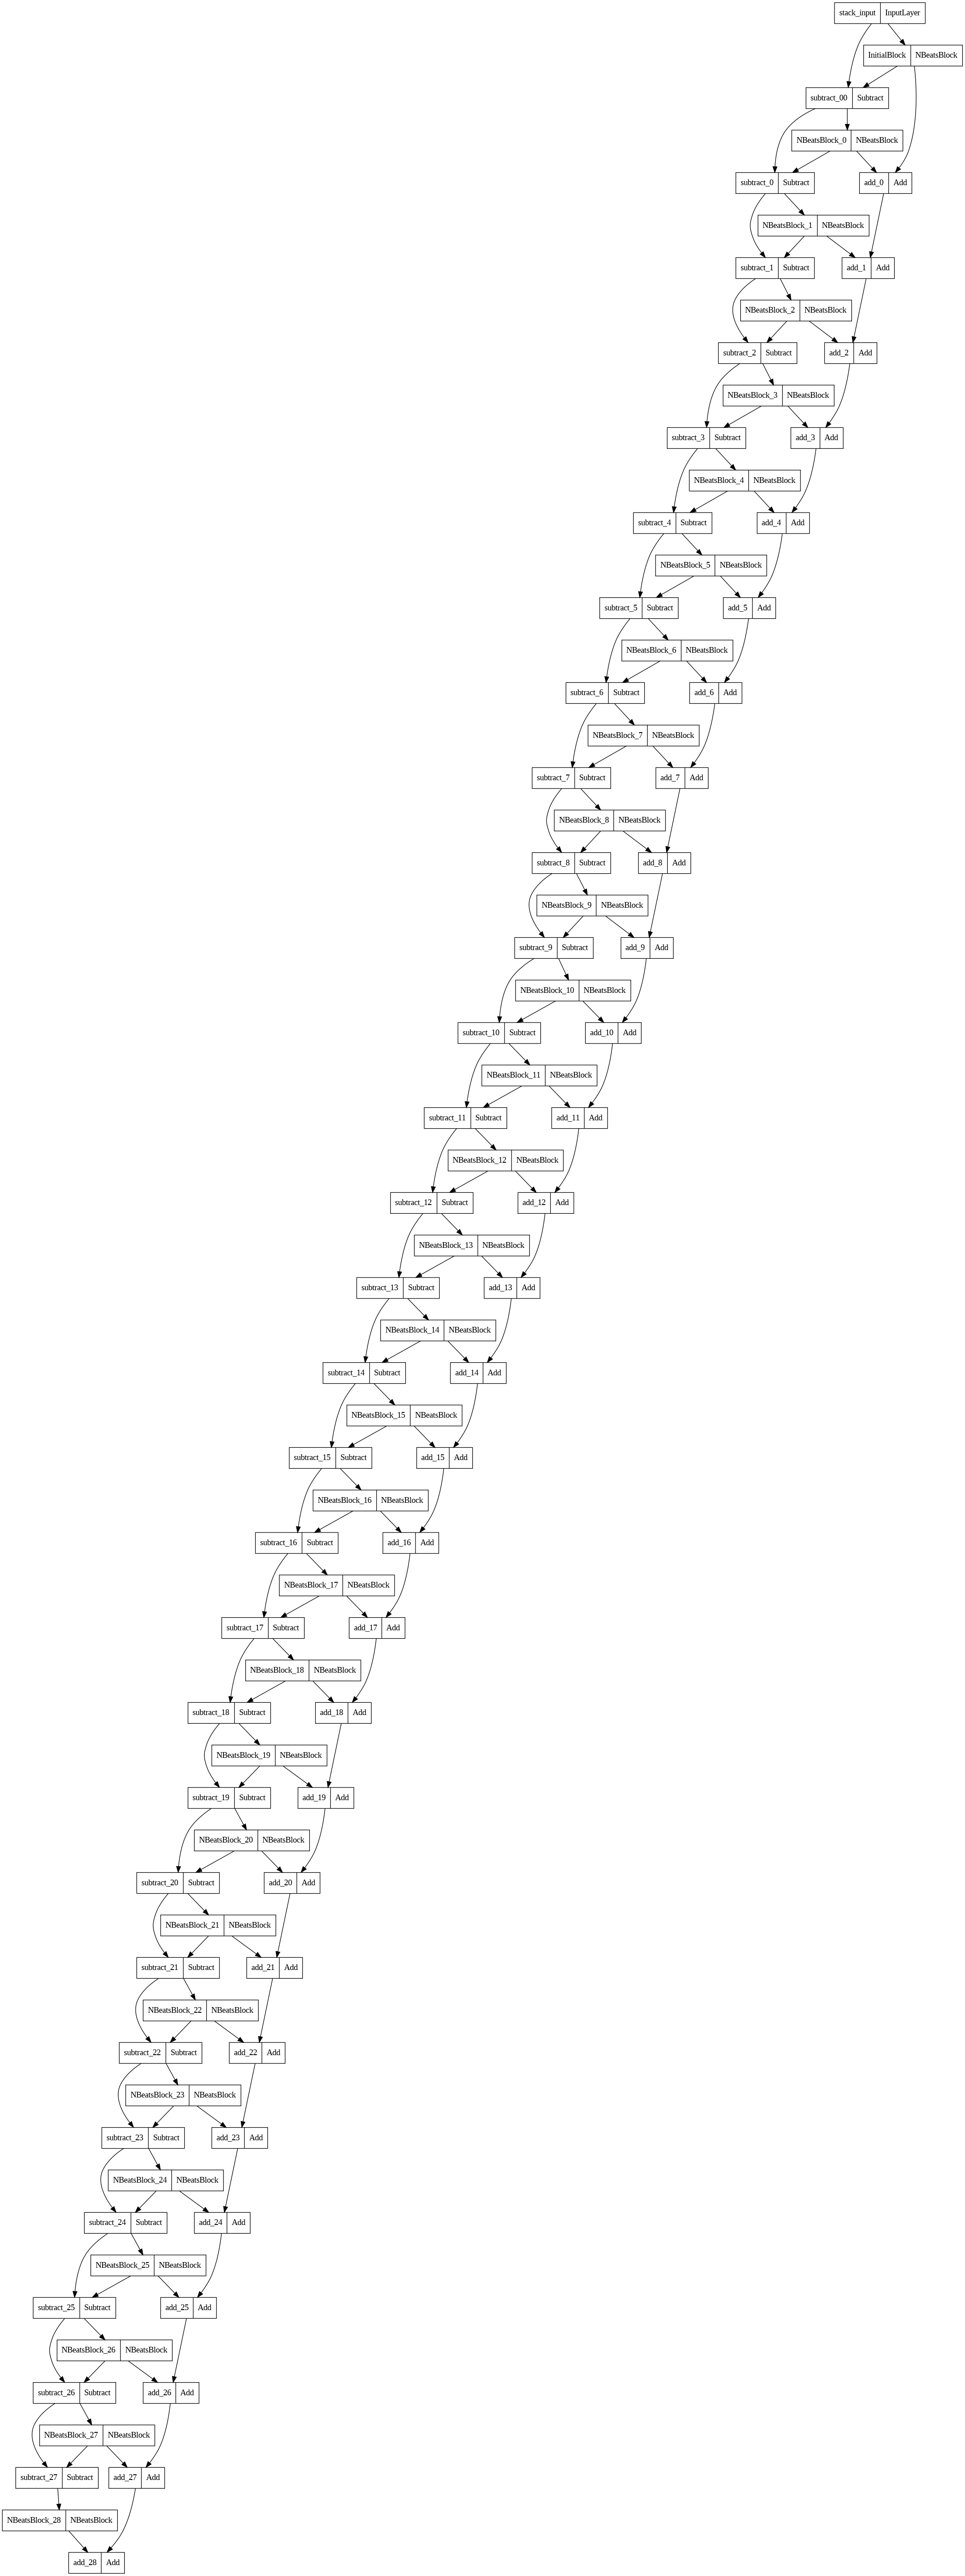

In [127]:
from tensorflow.keras.utils import plot_model
plot_model(model_7)

# **Model 8: Creating an ensemble (stacking different models together)**

In [128]:
HORIZON, WINDOW_SIZE

(1, 7)

In [129]:
def get_ensemble_models(horizon=HORIZON,
                        train_data = train_dataset,
                        test_data = test_dataset,
                        num_iter=10,
                        num_epochs=100,
                        loss_fns = ["mae", "mse", "mape"]):

    ensemble_models = []

    for i in range(num_iter):
        for loss_function in loss_fns:
            print(f"Optimizing model by reducing: {loss_function} for {num_epochs} epochs, model number: {i}")

            model = tf.keras.Sequential([
                layers.Dense(128, kernel_initializer = "he_normal", activation = "relu"),
                layers.Dense(128, kernel_initializer = "he_normal", activation = "relu"),
                layers.Dense(HORIZON)
            ])

            model.compile(loss = loss_fns,
                          optimizer = tf.keras.optimizers.Adam(),
                          metrics = ["mae", "mse"])

            model.fit(train_data,
                      epochs = num_epochs,
                      verbose = 0,
                      validation_data = test_data,
                      callbacks = [tf.keras.callbacks.EarlyStopping(monitor = "val_loss",
                                                                    patience = 200,
                                                                    restore_best_weights=True),
                                   tf.keras.callbacks.ReduceLROnPlateau(monitor = "val_loss",
                                                                        patience = 100,
                                                                        verbose=1)])
            ensemble_models.append(model)

    return ensemble_models



In [130]:
%%time

ensemble_models = get_ensemble_models(num_iter = 5,
                                      num_epochs = 1000)

Optimizing model by reducing: mae for 1000 epochs, model number: 0

Epoch 907: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
Optimizing model by reducing: mse for 1000 epochs, model number: 0
Optimizing model by reducing: mape for 1000 epochs, model number: 0

Epoch 800: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 900: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
Optimizing model by reducing: mae for 1000 epochs, model number: 1

Epoch 701: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 801: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
Optimizing model by reducing: mse for 1000 epochs, model number: 1

Epoch 557: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 872: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.

Epoch 972: ReduceLROnPlateau reducing learning rate to 1.0000000656873453e-06.
Optimizing model by redu

In [131]:
def make_ensemble_preds(ensemble_models, data):
    ensemble_preds = []
    for model in ensemble_models:
        preds = model.predict(data)
        ensemble_preds.append(preds)
    return tf.constant(tf.squeeze(ensemble_preds))
    # return ensemble_preds

In [132]:
ensemble_preds = make_ensemble_preds(ensemble_models = ensemble_models,
                                     data = test_dataset)
ensemble_preds

1/1 [==============================] - 0s 40ms/step


1/1 [==============================] - 0s 49ms/step


1/1 [==============================] - 0s 46ms/step


<tf.Tensor: shape=(15, 556), dtype=float32, numpy=
array([[ 8794.0625,  8782.833 ,  9052.925 , ..., 50203.68  , 48425.918 ,
        46024.46  ],
       [ 8754.737 ,  8686.324 ,  8999.088 , ..., 49158.09  , 48119.83  ,
        45522.79  ],
       [ 8750.663 ,  8809.948 ,  9098.061 , ..., 50274.21  , 48101.55  ,
        46630.867 ],
       ...,
       [ 8794.082 ,  8682.656 ,  9019.94  , ..., 50013.918 , 48654.273 ,
        45991.85  ],
       [ 8838.496 ,  8863.723 ,  9011.0205, ..., 50391.336 , 47984.92  ,
        46282.266 ],
       [ 8850.775 ,  8785.846 ,  9029.247 , ..., 49716.457 , 48657.67  ,
        45955.074 ]], dtype=float32)>

In [133]:
ensemble_results = evaluate_preds(y_true = y_test,
                                  y_pred = np.median(ensemble_preds, axis=0))
ensemble_results

{'mae': 569.32184,
 'mse': 1143289.8,
 'rmse': 1069.2473,
 'mape': 2.5806346,
 'mase': 24.528276}

In [135]:
def get_upper_lower(preds):
    std = tf.math.reduce_std(preds,axis=0)
    interval = 1.96 * std
    preds_mean = tf.reduce_mean(preds, axis=0)
    lower, upper = preds_mean - interval, preds_mean + interval
    return lower, upper

lower, upper = get_upper_lower(preds = ensemble_preds)

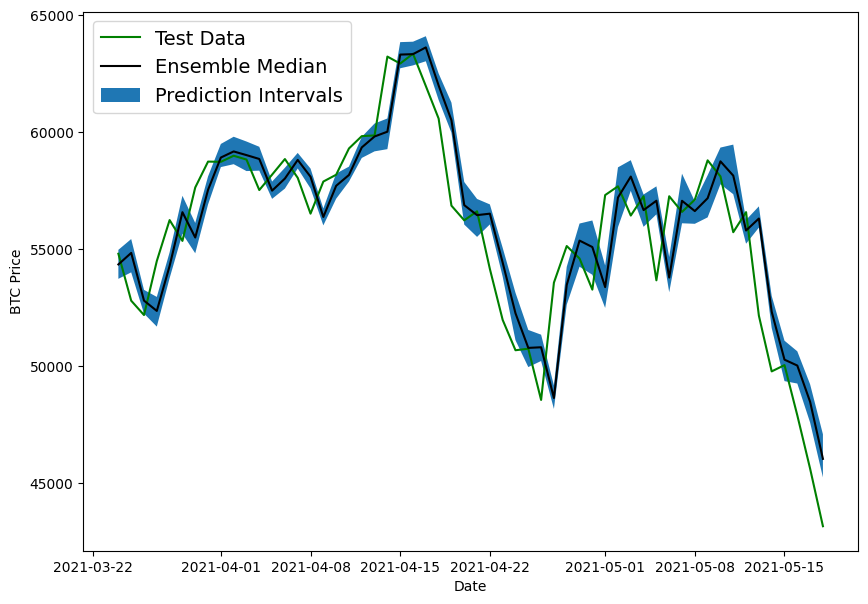

In [138]:
ensemble_median = np.median(ensemble_preds, axis=0)

# Plot the median of our ensemble preds along with the prediction intervals (where the predictions fall between)
offset=500
plt.figure(figsize=(10, 7))
plt.plot(X_test.index[offset:], y_test[offset:], "g", label="Test Data")
plt.plot(X_test.index[offset:], ensemble_median[offset:], "k-", label="Ensemble Median")
plt.xlabel("Date")
plt.ylabel("BTC Price")
plt.fill_between(X_test.index[offset:],
                 (lower)[offset:],
                 (upper)[offset:], label="Prediction Intervals")
plt.legend(loc="upper left", fontsize=14);
